# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [65]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

In [66]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Filtrando o dataset para manter apenas as linhas onde 'tip_pct' é menor que 50%
tips = tips[tips['tip_pct'] < 0.50]

In [67]:
reg_model = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           8.79e-23
Time:                        22:29:23   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.

In [68]:
model_refined = smf.ols('tip ~ net_bill', data=tips).fit()

print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.41e-25
Time:                        22:29:24   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.0

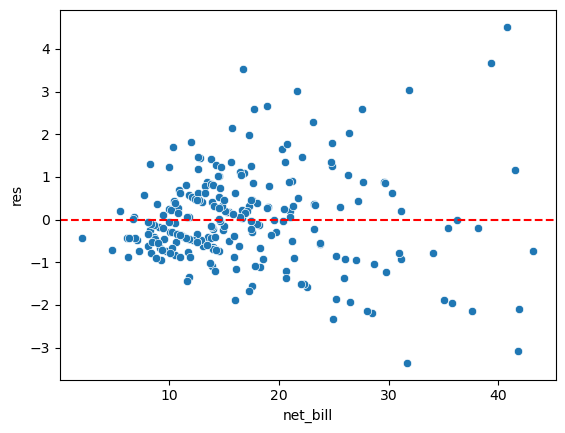

In [69]:
tips['res'] = model_refined.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')


In [70]:
model_log = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.13e-25
Time:                        22:29:24   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427  

In [71]:
model_poly = smf.ols('tip ~ net_bill + I(np.power(net_bill, 2))', data=tips).fit()

print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     70.98
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           6.36e-25
Time:                        22:29:24   Log-Likelihood:                -364.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     239   BIC:                             745.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [72]:
r_squared_values = {
    'Modelo completo': reg_model.rsquared,
    'Modelo refinado': model_refined.rsquared,
    'Modelo log': model_log.rsquared,
    'Modelo polinomial': model_poly.rsquared
}

# Comparando e imprimindo qual modelo tem o maior R²
best_model = max(r_squared_values, key=r_squared_values.get)

# Imprimir R² de cada modelo e qual é o melhor
print("R² de cada modelo:")
for model_name, r_squared in r_squared_values.items():
    print(f"{model_name}: {r_squared:.4f}")

print(f"\nO modelo que mais explica o fenômeno da gorjeta é o: {best_model}")

R² de cada modelo:
Modelo completo: 0.3691
Modelo refinado: 0.3635
Modelo log: 0.3675
Modelo polinomial: 0.3726

O modelo que mais explica o fenômeno da gorjeta é o: Modelo polinomial


obs: removi a atividade 2 pois a mesma está duplicada em relação a atividade 1.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [73]:
renda = pd.read_csv('previsao_de_renda.csv')


In [74]:
modelo = smf.ols('renda ~ tempo_emprego', data=renda).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:29:25   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

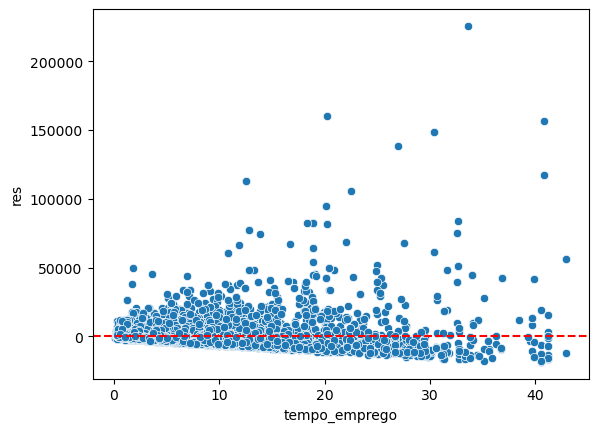

In [75]:
renda['res'] = modelo.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

In [76]:
modelo_log = smf.ols('np.log(renda) ~ tempo_emprego', data=renda).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:29:26   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

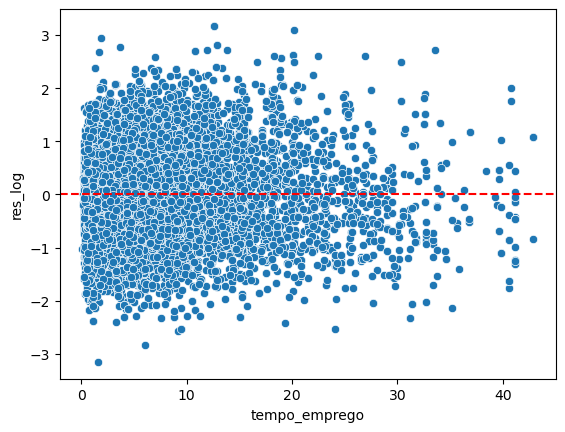

In [77]:
renda['res_log'] = modelo_log.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

In [78]:

modelo2 = smf.ols('renda ~ tempo_emprego + idade + qt_pessoas_residencia + educacao + tipo_renda + sexo + posse_de_imovel + posse_de_veiculo', 
                 data=renda).fit()

print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     304.8
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:29:27   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12412   BIC:                         2.577e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [88]:
modelo3 = smf.ols('np.log(renda) ~ tempo_emprego + idade + sexo + posse_de_imovel + qt_pessoas_residencia', 
                 data=renda).fit()

print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1312.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:36:19   Log-Likelihood:                -13682.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12421   BIC:                         2.742e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [90]:
residuos = modelo3.resid



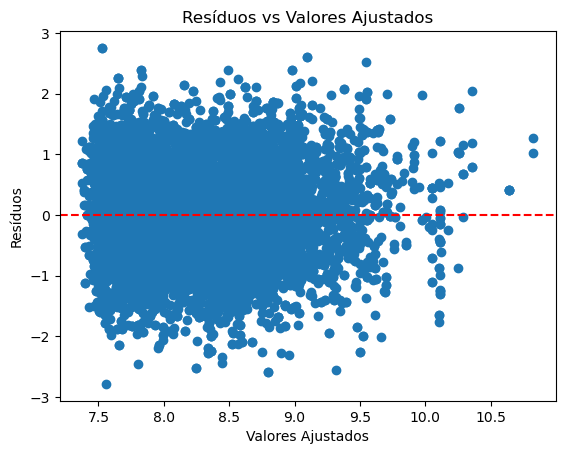

In [91]:
valores_ajustados = modelo3.fittedvalues

# Gráfico de resíduos vs valores ajustados
plt.scatter(valores_ajustados, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()